Tutorial 2: Aggregator
======================

In the previous tutorial, we fitted 3 datasets with an identical `NonLinearSearch`, outputting the results of each to a
unique folder on our hard disk.

In this tutorial, we'll use the `Aggregator` to load the `Result`'s and manipulate them using our Jupyter
notebook. The API for using a `Result` is described fully in tutorial 6 of chapter 1 of **HowToFit**.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autofit as af

/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace`


We now load the results in the `output` folder into a sqlite database using the `Aggregator`. We simply point to the 
path where we want the database to be created and add the directory `autofit_workspace/output/howtofit/database`.

Checkout the output folder, you should see a `database.sqlite` file which contains the model-fits to the 3 `Gaussian`
datasets.

In [2]:
from autofit.database.aggregator import Aggregator

agg = Aggregator.from_database(
    path.join("output", "howtofit", "database", "database.sqlite")
)

agg.add_directory(path.join("output", "howtofit", "database"))

Aggregator loading phases... could take some time.

 A total of 6 phases and results were found.


Before using the aggregator to inspect results, let me quickly cover Python generators. A generator is an object that 
iterates over a function when it is called. The aggregator creates all of the objects that it loads from the database 
as generators (as opposed to a list, or dictionary, or other Python type).

Why? Because lists and dictionaries store every entry in memory simultaneously. If you fit many datasets, this will use 
a lot of memory and crash your laptop! On the other hand, a generator only stores the object in memory when it is used; 
Python is then free to overwrite it afterwards. Thus, your laptop won't crash!

There are two things to bare in mind with generators:

1) A generator has no length and to determine how many entries it contains you first must turn it into a list.

2) Once we use a generator, we cannot use it again and need to remake it. For this reason, we typically avoid 
 storing the generator as a variable and instead use the aggregator to create them on use.

We can now create a `samples` generator of every fit. As we saw in the `result.py` example scripts, an instance of 
the `Samples` class acts as an interface to the results of the non-linear search.

In [3]:
samples_gen = agg.values("samples")

When we print this list of outputs you should see over 3 different `NestSamples` instances, corresponding to the 3
model-fits we performed in the previous tutorial.

In [4]:
print("Emcee Samples:\n")
print(samples_gen)
print("Total Samples Objects = ", len(list(samples_gen)), "\n")

Emcee Samples:

[<autofit.non_linear.samples.NestSamples object at 0x7f86806e1430>, <autofit.non_linear.mcmc.emcee.EmceeSamples object at 0x7f86806d02e0>, <autofit.non_linear.samples.NestSamples object at 0x7f864dd00e50>, <autofit.non_linear.mcmc.emcee.EmceeSamples object at 0x7f864dd07370>, <autofit.non_linear.samples.NestSamples object at 0x7f864a246b50>, <autofit.non_linear.mcmc.emcee.EmceeSamples object at 0x7f864a246dc0>]
Total Samples Objects =  6 



We've encountered the `Samples` class in previous tutorials. As we saw in chapter 1, the `Samples` class contains all 
the accepted parameter samples of the `NonLinearSearch`, which is a list of lists where:

 - The outer list is the size of the total number of samples.
 - The inner list is the size of the number of free parameters in the fit.

With the `Aggregator` we can now get information on the `Samples` of all 3 model-fits, as opposed to just 1 fit using 
its `Result` object.

In [5]:
for samples in agg.values("samples"):
    print("All parameters of the very first sample")
    print(samples.parameters[0])
    print("The tenth sample`s third parameter")
    print(samples.parameters[9][2])
    print()

All parameters of the very first sample
[65.95026538924505, 84.46752489397355, 8.519546449640536]
The tenth sample`s third parameter
12.471138793833159

All parameters of the very first sample
[50.36548580092695, 1.147144326988933, 12.676992066070337]
The tenth sample`s third parameter
12.389610751230718

All parameters of the very first sample
[22.996048559422665, 99.8961923249971, 1.1791926685170786]
The tenth sample`s third parameter
14.468103396633165

All parameters of the very first sample
[50.69594362438223, 0.9986705659953211, 12.594223208976068]
The tenth sample`s third parameter
12.603177252081913

All parameters of the very first sample
[21.42288926065249, 52.49540784721225, 7.601942715803046]
The tenth sample`s third parameter
15.0511210983322

All parameters of the very first sample
[49.51572183124327, 1.079324970640063, 12.605609932298005]
The tenth sample`s third parameter
12.666967109350335



We can use the `Aggregator` to get information on the `log_likelihoods`, log_priors`, `weights`, etc. of every fit.

In [6]:
for samples in agg.values("samples"):
    print("log(likelihood), log(prior), log(posterior) and weight of the tenth sample.")
    print(samples.log_likelihoods[9])
    print(samples.log_priors[9])
    print(samples.log_posteriors[9])
    print(samples.weights[9])
    print()

log(likelihood), log(prior), log(posterior) and weight of the tenth sample.
-55276.75806926772
0.26494937998264356
-55276.49311988774
0.0

log(likelihood), log(prior), log(posterior) and weight of the tenth sample.
-54591.722165678904
1.0818540469069806
-54590.640311632
1.0

log(likelihood), log(prior), log(posterior) and weight of the tenth sample.
-10971.129524047577
0.5157961088830134
-10970.613727938695
0.0

log(likelihood), log(prior), log(posterior) and weight of the tenth sample.
-10246.101102447286
0.9001904231079301
-10245.200912024178
1.0

log(likelihood), log(prior), log(posterior) and weight of the tenth sample.
-6576.161151944584
0.5581074497177271
-6575.6030444948665
0.0

log(likelihood), log(prior), log(posterior) and weight of the tenth sample.
-4826.2761336708445
1.2956098242841416
-4824.980523846561
1.0



We can use the `Sample`'s to create a list of the `max_log_likelihood_vector` of each fit to our three images.

In [7]:
vector = [samps.max_log_likelihood_vector for samps in agg.values("samples")]
print("Maximum Log Likelihood Parameter Lists:\n")
print(vector, "\n")

Maximum Log Likelihood Parameter Lists:

[[46.563472489550094, 40.19271233698261, 10.324294825239022], [49.99917201747321, 24.982210232645606, 0.9963688588783448], [48.01758208098854, 31.201571090402656, 11.782052813492967], [49.922247514249484, 24.77114836677721, 4.95193674565392], [46.554463879849806, 22.06453752833443, 7.666750159832245], [50.016303754655084, 24.308323215984156, 9.840938375521471]] 



As discussed in chapter 1, vectors are not ideal because we can`t be sure which values correspond to which parameters.

We can use the `Aggregator` to create the `max_log_likelihood_instance` of every fit.

In [8]:
instances = [samps.max_log_likelihood_instance for samps in agg.values("samples")]
print("Maximum Log Likelihood Model Instances:\n")
print(instances, "\n")

Maximum Log Likelihood Model Instances:

[<autofit.mapper.model.ModelInstance object at 0x7f863c963550>, <autofit.mapper.model.ModelInstance object at 0x7f863ece35b0>, <autofit.mapper.model.ModelInstance object at 0x7f863ece34c0>, <autofit.mapper.model.ModelInstance object at 0x7f863c9634f0>, <autofit.mapper.model.ModelInstance object at 0x7f863ece3700>, <autofit.mapper.model.ModelInstance object at 0x7f864689beb0>] 



The model instance contains all the model components of our fit which for the fits above was a single `Gaussian`
profile (the word `gaussian` comes from what we called it in the `CollectionPriorModel` above).

In [9]:
print(instances[0].gaussian)
print(instances[1].gaussian)
print(instances[2].gaussian)

This, of course, gives us access to any individual parameter of our maximum log likelihood `instance`. Below, we see 
that the 3 `Gaussian`s were simulated using `sigma` values of 1.0, 5.0 and 10.0.

In [10]:
print(instances[0].gaussian.sigma)
print(instances[1].gaussian.sigma)
print(instances[2].gaussian.sigma)

10.324294825239022
0.9963688588783448
11.782052813492967


We can also access the `median_pdf` model via the `Aggregator`, as we saw for the `Samples` object in chapter 1.

In [11]:
mp_vectors = [samps.median_pdf_vector for samps in agg.values("samples")]
mp_instances = [samps.median_pdf_instance for samps in agg.values("samples")]

print("Median PDF Model Parameter Lists:\n")
print(mp_vectors, "\n")
print("Most probable Model Instances:\n")
print(mp_instances, "\n")

Median PDF Model Parameter Lists:

[[46.563472489550094, 40.19271233698261, 10.324294825239022], [49.99910549461242, 24.97839181016635, 0.9963634182693135], [48.01758208098854, 31.201571090402656, 11.782052813492967], [49.92418409579551, 24.774805598126754, 4.952581941964734], [46.554463879849806, 22.06453752833443, 7.666750159832245], [50.02403534463948, 24.28166675532924, 9.830393914808749]] 

Most probable Model Instances:

[<autofit.mapper.model.ModelInstance object at 0x7f8642692190>, <autofit.mapper.model.ModelInstance object at 0x7f863ed68730>, <autofit.mapper.model.ModelInstance object at 0x7f863ed68c40>, <autofit.mapper.model.ModelInstance object at 0x7f863ed68970>, <autofit.mapper.model.ModelInstance object at 0x7f863ed68d60>, <autofit.mapper.model.ModelInstance object at 0x7f863ed685e0>] 



We can also print the `model_results` of all phases, which is string that summarizes every fit`s model providing
quick inspection of all results.

In [12]:
results = agg.model_results
print("Model Results Summary:\n")
print(results, "\n")

Model Results Summary:

o.id IN (SELECT parent_id FROM object AS o WHERE o.name = 'model_results') 



Lets end the tutorial with something more ambitious. Lets create a plot of the inferred `sigma` values vs `intensity` 
of each `Gaussian` profile, including error bars at $3\sigma$ confidence.

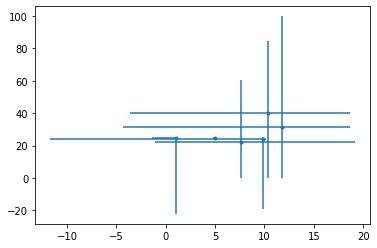

In [13]:
import matplotlib.pyplot as plt

mp_instances = [samps.median_pdf_instance for samps in agg.values("samples")]
ue3_instances = [
    samp.error_instance_at_upper_sigma(sigma=3.0) for samp in agg.values("samples")
]
le3_instances = [
    samp.error_instance_at_lower_sigma(sigma=3.0) for samp in agg.values("samples")
]

mp_sigmas = [instance.gaussian.sigma for instance in mp_instances]
ue3_sigmas = [instance.gaussian.sigma for instance in ue3_instances]
le3_sigmas = [instance.gaussian.sigma for instance in le3_instances]
mp_intensitys = [instance.gaussian.intensity for instance in mp_instances]
ue3_intensitys = [instance.gaussian.intensity for instance in ue3_instances]
le3_intensitys = [instance.gaussian.intensity for instance in le3_instances]

plt.errorbar(
    x=mp_sigmas,
    y=mp_intensitys,
    marker=".",
    linestyle="",
    xerr=[le3_sigmas, ue3_sigmas],
    yerr=[le3_intensitys, ue3_intensitys],
)
plt.show()

With that, tutorial 2 is complete. 

The take home point of this tutorial is that everything that is available in a `Result` or `Samples` object is 
accessible via the `Aggregator`. 